In [1]:
import numpy as np
import pandas as pd
import scipy.io
import matplotlib.pyplot as plt

In [2]:
def ActualizarPesos(X, Y, THETA, B, ALPHA, ORDEN):
    N = len(X)
    dTheta = np.zeros(ORDEN)
    dB = 0
    f = np.zeros(N)
    
    for i in range(N):
        for j in range(ORDEN):
            f[i] += (X[i] ** (j+1)) * THETA[j]
    
    f = Y - (f + B)
    
    for i in range(ORDEN):
        dTheta[i] = np.sum(-2 * (X ** i) * f) / N
    
    dB = np.sum(-2 * f) / N
    THETA = THETA - (ALPHA * dTheta)
    B = B - (ALPHA * dB)
    
    return THETA, B


def MeanSquareError(X, Y, THETA, B, ORDEN):
    N = len(X)
    f = np.zeros(N)
    
    for i in range(N):
        for j in range(ORDEN):
            f[i] += (X[i] ** j) * THETA[j]
    
    f = Y - (f + B)
    Error = np.sum(f ** 2) / N
    
    return Error



def Entrenamiento(X, Y, THETA, B, ALPHA, ORDEN, EPOCHS):
    VECERROR = np.zeros(EPOCHS)
    
    for k in range(EPOCHS):
        THETA, B = ActualizarPesos(X, Y, THETA, B, ALPHA, ORDEN)
        VECERROR[k] = MeanSquareError(X, Y, THETA, B, ORDEN)
    
    return THETA, B, VECERROR


def PlotLinear(X, Y, THETA, B, ORDEN, MSE):
    X2 = np.arange(min(X), max(X), 0.01)
    N = len(X2)
    Y2 = np.zeros(N)
    
    for l in range(N):
        for h in range(ORDEN):
            Y2[l] += (X2[l] ** (h+1)) * THETA[h]
        Y2[l] += B
    
    plt.figure()
    plt.plot(X, Y, 'o')
    plt.plot(X2, Y2, linewidth=3)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Regresión de grado ' + str(ORDEN))
    plt.legend(['Datos', 'Regresión'])
    plt.show()
    
    plt.figure()
    plt.plot(MSE)
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.title('Mean Square Error')
    plt.show()

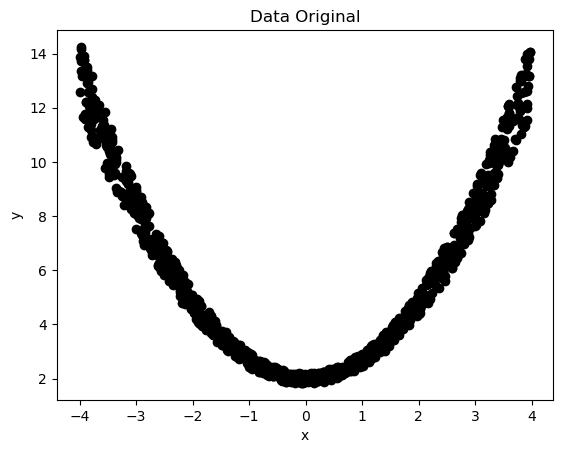

In [18]:
#######CARGAR LOS DATOS DE LOS QUE SE DESEA HACER UNA REGRESIÓN 
mat = scipy.io.loadmat('Polinomio2.mat')
x = mat['x'][0]
y=mat['y'][0]
plt.figure()
plt.plot(x, y, 'ok')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data Original')
plt.show()

In [19]:
#SE ESTABLECEN LOS HIPERPARAMETROS DE LA REGRESIÓN POLINOMIAL
orden=2
alpha=0.001
theta = np.zeros(orden)
b=0;
epochs=10000

In [ ]:
theta, b, MSE = Entrenamiento(x, y, theta, b, alpha, orden, epochs)
PlotLinear(x,y,theta,b,orden,MSE)

In [17]:
theta

array([ 1.45186462e+08, -3.92325415e+08,  2.90691257e+08])